In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 12,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

In [2]:
import numpy as np
import pandas as pd
import pystan
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
my_data = pd.read_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv')

In [4]:
for i in my_data.columns:
    print (i)

CATAID
OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh

In [5]:
my_rsgs = my_data.loc[my_data['UV_CLASS_YI2011']!='RSF']

In [10]:
palette = ['#dfc27d', '#a6611a']
my_rsgs['UV_CLASS_YI2011'].values.size

506

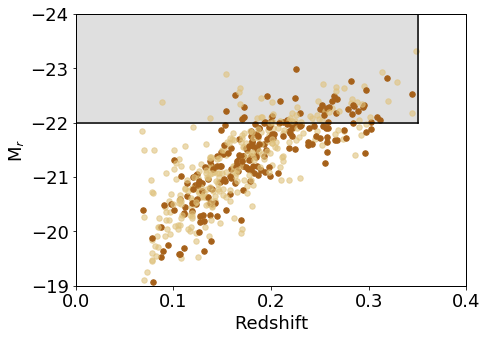

In [55]:
plt.rcParams.update(plotpars)
plt.fill_between(x=[0,0.35], y1=-24, y2=-22, color='gray', alpha=0.25)
plt.axhline(y=-22, xmax=0.875, color='black', lw=1.5)
plt.axvline(x=0.35, ymin=0.598, color='black', lw=1.5)
for i in range(my_rsgs['UV_CLASS_YI2011'].values.size):
    if my_rsgs['UV_CLASS_YI2011'].values[i]=='UV_WEAK':
        plt.scatter(my_rsgs['Z'].values[i], my_rsgs['MAG_ABSOLUTE_R'].values[i], c=palette[0], alpha=0.6, s=30)
    elif my_rsgs['UV_CLASS_YI2011'].values[i]=='UV_UPTURN':
        plt.scatter(my_rsgs['Z'].values[i], my_rsgs['MAG_ABSOLUTE_R'].values[i], c=palette[1], alpha=1., s=30)
    else:
        continue
plt.xlim([0., 0.4])
plt.ylim([-24, -19])
plt.ylabel("M$_r$")
plt.xlabel("Redshift")
plt.gca().invert_yaxis()
plt.savefig('../../LargeFilesResults/PaperFigs/appendix_vollim.png')
plt.savefig('../../LargeFilesResults/PaperFigs/appendix_vollim.pdf')
plt.show()

In [13]:
plt.axhline?

In [ ]:
subsample = my_rsgs[(my_rsgs['MAG_ABSOLUTE_R']<=-22) & (my_rsgs['Z']<=0.35)]

In [ ]:
plt.scatter(subsample['Z'], subsample['MAG_ABSOLUTE_R'], alpha=0.3)
plt.ylabel("M$_r$")
plt.xlabel("redshift")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
cataid = subsample['CATAID'].values
uv_class = subsample['UV_CLASS_YI2011'].values
whan_class = subsample['WHAN_CLASS'].values

In [ ]:
logit_class = []
for i in range(cataid.size):
    if uv_class[i]=='UV_UPTURN':
        logit_class.append(1)
    elif uv_class[i] == 'UV_WEAK':
        logit_class.append(0)
    else:
        continue
logit_class = np.array(logit_class)

In [ ]:
whan_class[0]

In [ ]:
whan_class_numbers = []
for i in range(cataid.size):
    if whan_class[i]=='NA':
        whan_class_numbers.append(0)
    elif whan_class[i]=='Retired/Passive':
        whan_class_numbers.append(1)
    elif whan_class[i]=='wAGN':
        whan_class_numbers.append(2)
    elif whan_class[i]=='sAGN':
        whan_class_numbers.append(3)
    elif whan_class[i]=='SF':
        whan_class_numbers.append(4)
    else:
        whan_class_numbers.append(0)
whan_class_numbers = np.array(whan_class_numbers)

In [ ]:
whan_class_numbers

In [ ]:
logit_dataframe                                   = {}
logit_dataframe['CATAID']                         = cataid
logit_dataframe['LOGIT_CLASS(1-UVUP;0-UVWEAK)']   = logit_class
logit_dataframe['Z']                              = subsample['Z']
logit_dataframe['STELLAR_MASS']                   = subsample['logmstar']
logit_dataframe['UV_CLASS']                       = uv_class
logit_dataframe['WHAN_CLASS']                     = whan_class
logit_dataframe['WHAN(0-NA;1-RP;2-wA;3-sA;4-SF)'] = whan_class_numbers

In [ ]:
logit_df = pd.DataFrame(logit_dataframe)

In [ ]:
logit_df = logit_df.set_index('CATAID')

In [ ]:
logit_df

In [ ]:
logit_df.to_csv('../../Catalogue/binom_reg_dataset_VOLLIM.csv', index=True)

In [50]:
plt.scatter?